# Data:
- Collect from Kaggle 
- Will be used to predict customer churn - logistic regression 
- Telco data 
- 20 columns with a target variable of churn 

In [50]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Data has a total of 21 columns

In [51]:
len(df.columns)

21

In [52]:
df.head().to_clipboard()

- Data set has been cleansed of all missing values 
- Mixture of qualitative and quantitative data 

In [53]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Preprocessing
- Creating dummies for qualitative data with binary outputs (0 or 1)
- Also have to map out the target to turn yes and no into (0 or 1) 

In [54]:

# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [55]:
# Replace the fruit column values
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Train Test Split Data 
- Training data will be used to train our logistic regression model to predict test outputs
- Have to drop identifiers (customerID) as well as target from the training set ('churn')
- Test size will be 25% of the data with 75% of the set used to train the models predictions

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Model 
- Model object will be stored in variable lgreg


In [57]:
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

LogisticRegression()

# Cross Validate 
- Checking to see what the training score returns to assess the quality of the model 
- Looking at the training score you can see that we a have an accepable model to make predictions (train_score>.70)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
pd.DataFrame(pd.DataFrame(cross_validate(lgreg, X_train, y_train, return_train_score=True)).mean())

,0
fit_time,0.063386
score_time,0.001202
test_score,0.806786
train_score,0.807243


# Evaluation Metrics

- When assessing a model such a logistic regression that takes in continuous and discrete types to return a binary predictor you hav to create a confusion matrix to assess the results. 
- The confusion matrix is used to assess and create different metrics to calculate the true positive/negative rate
    - These metrics include:
        - accuracy_score 
        - precision_score
        - recall_score
        - f1_score
        - ROC 
- Looking at our ROC we can see that a solid threshold for classiciation is between .20 - .40
 - If we were to be assessesing different models to draw comparisons we would also include the AUC

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1381,  168],
       [ 261,  300]])

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the testing data
y_pred = lgreg.predict(X_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.7966824644549763
Precision: 0.6410256410256411
Recall: 0.5347593582887701
F1 Score: 0.5830903790087464


In [79]:
# More optimal method of evaluation 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



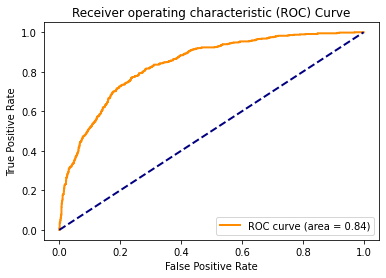

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get the predicted probabilities for the test set
y_pred_prob = lgreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr) and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# How can we improve this model ?
- Looking at the ROC we can see that a good range to test thresholds is between .2 - .4 
- Below we were able to plot out the optimal threshold 

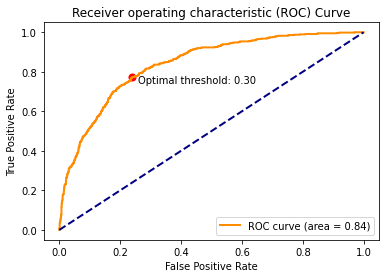

In [82]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get the predicted probabilities for the test set
y_pred_prob = lgreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr) and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Subtracing the true positive rate by the false positive rate to get the 
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')

# Plot the optimal threshold on the ROC curve
plt.scatter(fpr[np.argmax(j_scores)], tpr[np.argmax(j_scores)], s=50, marker='o', color='red')
plt.text(fpr[np.argmax(j_scores)] + 0.02, tpr[np.argmax(j_scores)] - 0.03, 'Optimal threshold: %0.2f' % best_threshold)

plt.legend(loc="lower right")
plt.show()


# Threshold Optimization 
- .30 optimal threshold 

## Old results
- Accuracy: 0.7966824644549763
- Precision: 0.6410256410256411
- Recall: 0.5347593582887701
- F1 Score: 0.5830903790087464

Optimization was a success with a increase in Recall and F1 !

In [90]:
# Train the model on the training set
lgreg.fit(X_train, y_train)

# Get the predicted probabilities for the test set
y_pred_prob = lgreg.predict_proba(X_test)[:, 1]

# Set the threshold to 0.3
threshold = 0.3

# Convert the predicted probabilities to predicted classes using the threshold
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.76
Precision: 0.54
Recall: 0.77
F1 Score: 0.63


- Looking at the results of the old versus the optimized model you can see how the confusion matrix the optimized model with threshold of .3 returns:
- less TP and FN
- More FP and TN

array([[1381,  168],
       [ 261,  300]])

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1181,  368],
       [ 130,  431]])